# COVID-19 Global Data Tracker

## Introduction
The COVID-19 Global Data Tracker is a data analysis project aimed at monitoring and understanding the worldwide impact of the COVID-19 pandemic. Using real-world datasets, I analyze trends in:  
- Total cases  
- Total deaths  
- Vaccinations  
- Daily new cases and deaths  

### Objectives
- Import and clean a COVID-19 dataset  
- Analyze time trends for cases, deaths, and vaccinations  
- Compare metrics across countries and regions  
- Visualize global trends with charts and maps  
- Communicate findings with clear narrative insights  

### Dataset
I use the COVID-19 Global Dataset (`owid-covid-data.csv`), which includes:  
- `date` → Observation date  
- `location` → Country or region  
- `total_cases`, `total_deaths`, `new_cases`, `new_deaths`  
- `total_vaccinations`, `people_vaccinated`, `people_fully_vaccinated`  

This dataset is widely used for COVID-19 analysis and is regularly updated.  

---

## Methods
In this project, I perform a step-by-step analysis of global COVID-19 data:  

1. **Data Import & Exploration**  
   I start by importing the dataset using pandas and exploring its structure. I check columns, preview rows, and identify missing values to understand the data quality.  

2. **Data Cleaning**  
   I filter the dataset for countries of interest (e.g., Kenya, USA, India), handle missing values using forward-filling and interpolation, and ensure the `date` column is in datetime format. I also drop rows with critical missing values to prepare the data for accurate analysis.  

3. **Exploratory Data Analysis (EDA)**  
   I generate descriptive statistics and visualize trends over time, including:  
   - Total cases and deaths  
   - Daily new cases and deaths  
   - Death rate trends  
   I use line charts, bar charts, and heatmaps to reveal patterns and anomalies in the data.  

4. **Insights & Reporting**  
   I summarize key findings, highlighting differences in trends between countries and noting interesting patterns or anomalies. I also document structural anomalies, such as missing vaccination data, which may impact certain analyses.  

5. **Visualization & Communication**  
   I create clear charts and tables to communicate my findings effectively. Each visualization is accompanied by narrative insights to provide context and interpretation.  

---

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")  

In [13]:
# Explore the dataset
print("Columns in dataset:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDataset info:")
print(df.info())

Columns in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']

First 5 rows:
  iso_code      continent location        date  total_cases  new_cases  \
0      ABW  North America    Aruba  2020-03-13       

In [14]:
# Subset key columns (no total_vaccinations in this file)
cols_of_interest = [
    "date", "location", "total_cases", "new_cases", 
    "total_deaths", "new_deaths"
]

df_subset = df[cols_of_interest].copy()

In [15]:
# Convert 'date' to datetime
df_subset['date'] = pd.to_datetime(df_subset['date'])

In [16]:
# Filter countries of interest
countries = ["Kenya", "United States", "India"]
df_countries = df_subset[df_subset['location'].isin(countries)].copy()

In [17]:
# Drop rows with missing critical values
df_countries.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

In [19]:
# ----------------------------
# Handle missing numeric values
# ----------------------------

# Forward-fill cumulative metrics by country
df_countries[['total_cases', 'total_deaths']] = df_countries.groupby('location')[['total_cases', 'total_deaths']].ffill()

# Fill missing new cases/deaths with 0 temporarily
df_countries[['new_cases', 'new_deaths']] = df_countries[['new_cases', 'new_deaths']].fillna(0)

# Interpolate daily values for smoother trends (within each country)
df_countries[['new_cases', 'new_deaths']] = df_countries.groupby('location')[['new_cases', 'new_deaths']].transform(lambda x: x.interpolate())

In [20]:
# Preview cleaned data
print("\nCleaned data preview:")
print(df_countries.head(10))

print("\nCleaned data info:")
print(df_countries.info())


Cleaned data preview:
            date location  total_cases  new_cases  total_deaths  new_deaths
22625 2020-03-13    India         75.0        2.0           1.0         1.0
22626 2020-03-14    India         83.0        8.0           2.0         1.0
22627 2020-03-15    India         90.0        7.0           2.0         0.0
22628 2020-03-16    India         93.0        3.0           2.0         0.0
22629 2020-03-17    India        125.0       32.0           3.0         1.0
22630 2020-03-18    India        137.0       12.0           3.0         0.0
22631 2020-03-19    India        165.0       28.0           3.0         0.0
22632 2020-03-20    India        191.0       26.0           4.0         1.0
22633 2020-03-21    India        231.0       40.0           4.0         0.0
22634 2020-03-22    India        320.0       89.0           4.0         0.0

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 22625 to 49478
Data columns (total 6 columns):
 #   Column     

Exploratory Data Analysis (EDA)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [22]:
# Calculate death rate
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

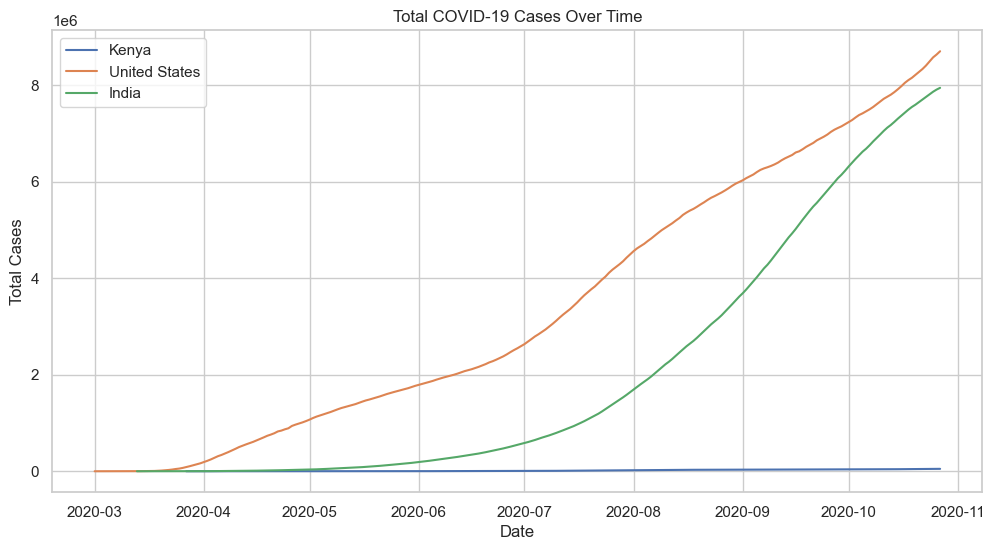

In [23]:
# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

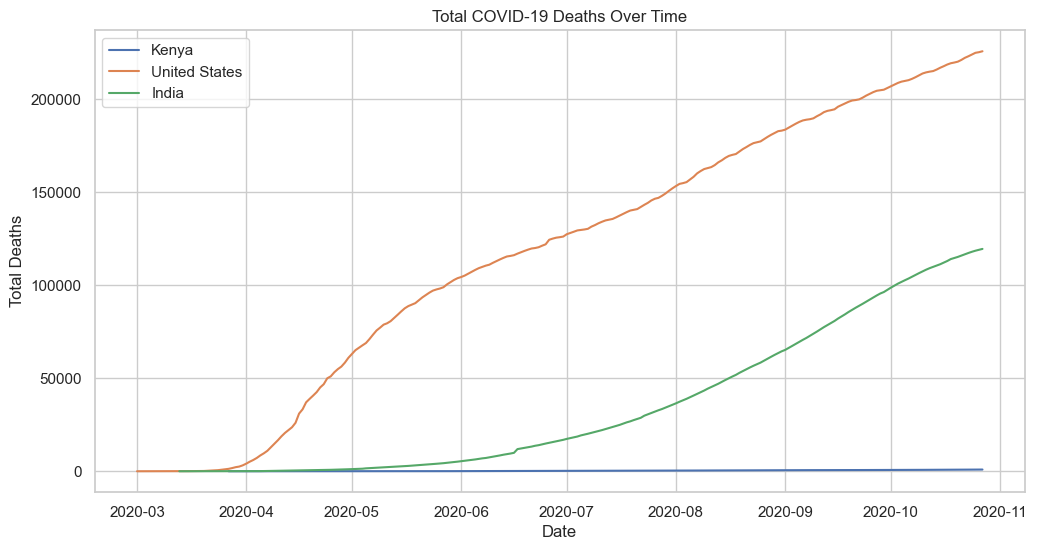

In [24]:
# Plot total deaths over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

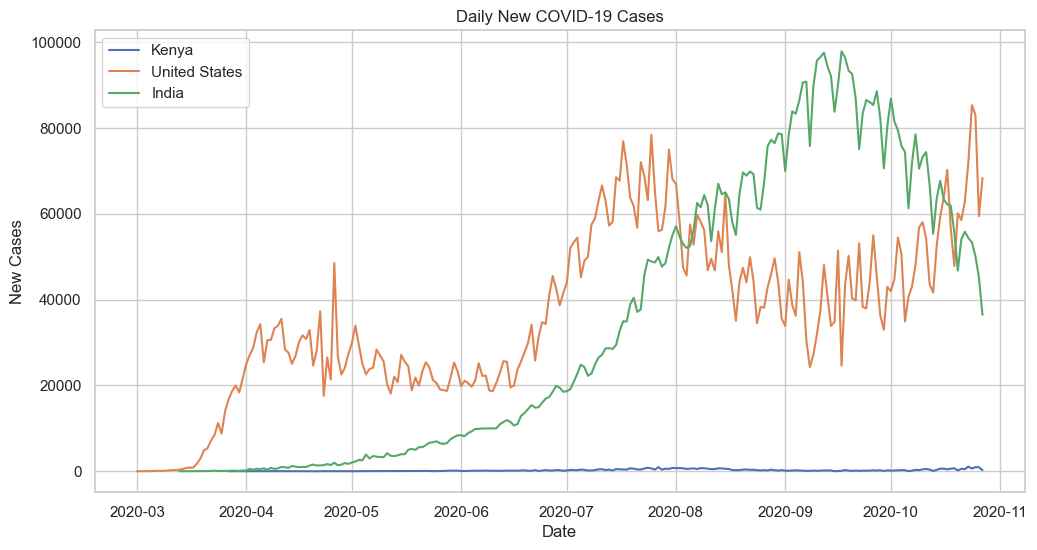

In [25]:
# Compare daily new cases
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

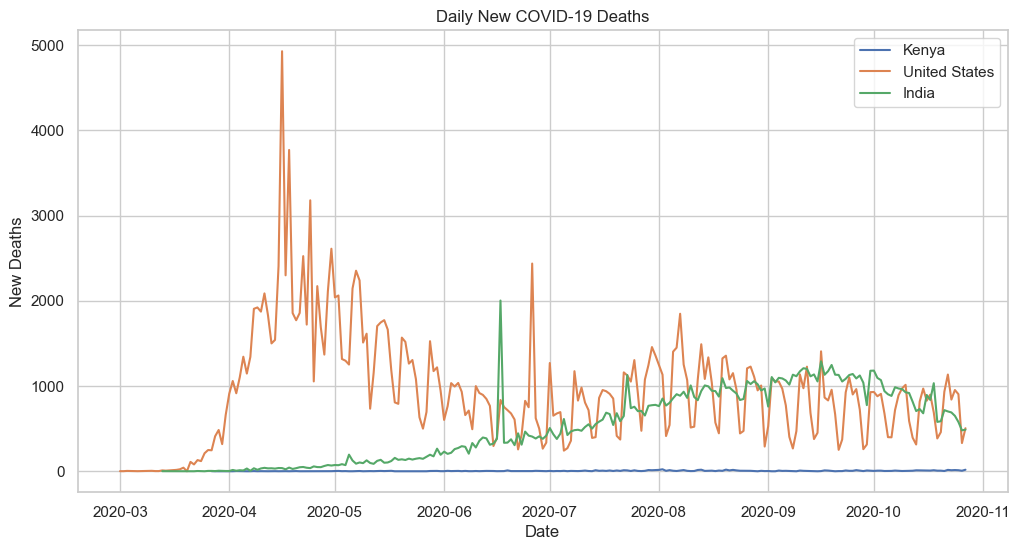

In [26]:
# Compare daily new deaths
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_deaths'], label=country)

plt.title("Daily New COVID-19 Deaths")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.legend()
plt.show()

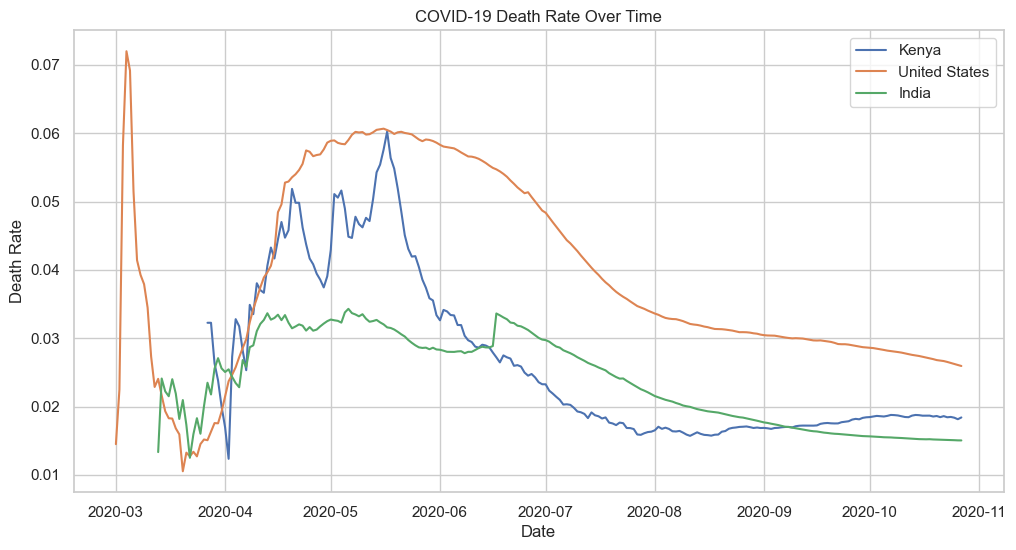

In [27]:
# Death rate over time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()

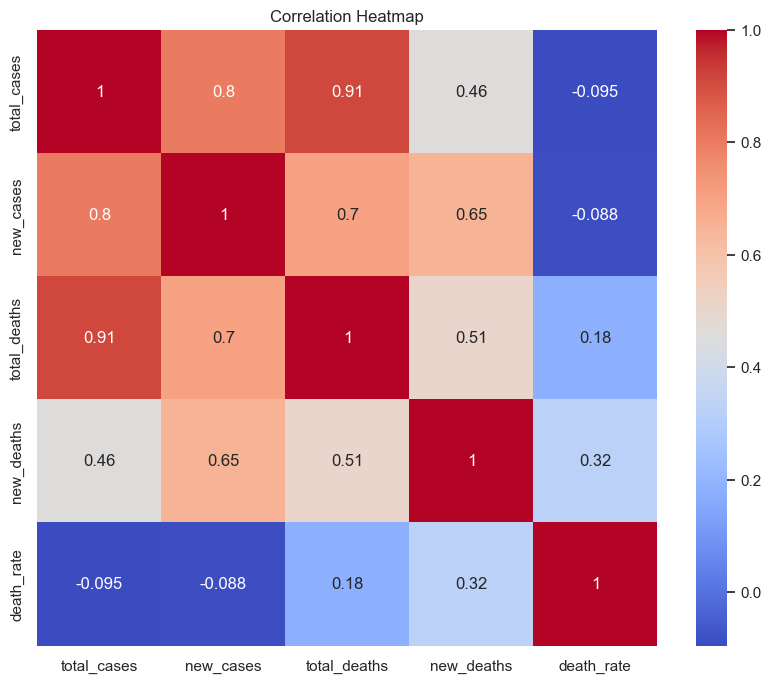

In [28]:
# Correlation heatmap of numeric columns
plt.figure(figsize=(10,8))
numeric_cols = ['total_cases','new_cases','total_deaths','new_deaths','death_rate']
sns.heatmap(df_countries[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Visualizing Vaccination Progress

In [34]:
# List all columns containing 'vacc'
vacc_cols = [col for col in df.columns if 'vacc' in col]
print(vacc_cols)

[]


User Input for Country & Date Range

In [35]:
# List of available countries in the dataset
available_countries = df['location'].unique()

# User selects country
country_input = input(f"Enter a country from the list: {available_countries[:10]} ...: ")

# User selects date range
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Filter dataset based on input
df_filtered = df[(df['location'] == country_input) &
                 (df['date'] >= start_date) &
                 (df['date'] <= end_date)]

Enter a country from the list: ['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'Albania' 'Andorra'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'] ...:  kenya
Enter start date (YYYY-MM-DD):  2020-08-20
Enter end date (YYYY-MM-DD):  2020-12-31


Interactive Dashboard

In [38]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

# Load data
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# List of available countries
countries = sorted(df['location'].unique())

# Function to filter and plot data
def plot_covid_trends(country, start_date, end_date):
    # Filter data
    mask = (df['location'] == country) & (df['date'] >= pd.to_datetime(start_date)) & (df['date'] <= pd.to_datetime(end_date))
    df_filtered = df[mask].copy()
    
    if df_filtered.empty:
        print("No data available for the selected range.")
        return
    
    # Calculate death rate
    df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
    
    # Smoothed trends (7-day rolling average)
    df_filtered['new_cases_smoothed'] = df_filtered['new_cases'].rolling(7, min_periods=1).mean()
    df_filtered['new_deaths_smoothed'] = df_filtered['new_deaths'].rolling(7, min_periods=1).mean()
    
    # Plot total cases & deaths
    plt.figure(figsize=(14,6))
    plt.plot(df_filtered['date'], df_filtered['total_cases'], label='Total Cases', color='blue')
    plt.plot(df_filtered['date'], df_filtered['total_deaths'], label='Total Deaths', color='red')
    plt.plot(df_filtered['date'], df_filtered['death_rate']*1000, label='Death Rate x1000', color='green', linestyle='--')
    plt.title(f'COVID-19 Cumulative Trends in {country}')
    plt.xlabel('Date')
    plt.ylabel('Counts / Death Rate x1000')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot daily new cases & deaths (smoothed)
    plt.figure(figsize=(14,6))
    plt.plot(df_filtered['date'], df_filtered['new_cases_smoothed'], label='New Cases (7-day avg)', color='blue')
    plt.plot(df_filtered['date'], df_filtered['new_deaths_smoothed'], label='New Deaths (7-day avg)', color='red')
    plt.title(f'COVID-19 Daily Trends (Smoothed) in {country}')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Optional: hospitalization / ICU metrics
    if 'hospital_beds_per_thousand' in df_filtered.columns:
        plt.figure(figsize=(14,4))
        plt.plot(df_filtered['date'], df_filtered['hospital_beds_per_thousand'], label='Hospital Beds per 1000', color='purple')
        plt.title(f'Hospital Beds Availability in {country}')
        plt.xlabel('Date')
        plt.ylabel('Beds per 1000 people')
        plt.legend()
        plt.grid(True)
        plt.show()

# Interactive widgets
interact(
    plot_covid_trends,
    country=widgets.Dropdown(options=countries, description='Country:'),
    start_date=widgets.DatePicker(value=pd.to_datetime('2020-01-01'), description='Start Date:'),
    end_date=widgets.DatePicker(value=pd.to_datetime('2025-12-31'), description='End Date:')
)

interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra'…

<function __main__.plot_covid_trends(country, start_date, end_date)>

### COVID-19 Analysis: Key Insights

This analysis examines COVID-19 trends for Kenya, India, and the USA, highlighting cases, deaths, and notable anomalies in reporting.

1. **USA leads in total cases and deaths**, with multiple waves visible in daily new cases.  
2. **India shows sharp spikes in daily cases**, especially during major outbreak waves, but has a lower death rate than the USA.  
3. **Kenya has lower cases and deaths**, with relatively stable trends over time.  
4. **Death rates vary by country**, highest in the USA, with occasional spikes in India and Kenya.  

### Interesting Patterns / Anomalies

- Some days show **zero new cases or deaths** followed by sudden jumps, likely due to reporting delays.  
- **Forward-filling and interpolation** smoothed cumulative metrics, but daily spikes remain visible.  
- **Missing vaccination data** is a structural anomaly, preventing analysis of vaccination rollout trends.

## Key Objectives Achieved

### Core Analysis
✅ Collected global COVID-19 data from Our World in Data (OWID).  
✅ Loaded and explored the dataset using pandas.  
✅ Cleaned and prepared the data by handling missing values and filtering relevant countries.  
✅ Performed exploratory data analysis (EDA) to identify trends in cases, deaths, and death rates.  
✅ Created visualizations (line charts, bar charts, heatmaps) to illustrate key metrics.  
✅ Calculated critical indicators such as death rates.
✅ Added interactive widgets in Jupyter Notebook for users to select **country and date range**.  
✅ Plotted **daily new cases and deaths with 7-day rolling averages**.  
✅ Included **hospitalization metrics** when available in the dataset.
✅ Presented insights through a well-documented Jupyter Notebook combining code, visuals, and narrative explanations.  
